In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


## Train and test data

In [19]:
# Load the housing prices data
train = pd.read_csv('../data/housing_data/train.csv')
test = pd.read_csv('../data/housing_data/test.csv')

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Preprocessing

### Delete ID

In [22]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


### Delete outliners

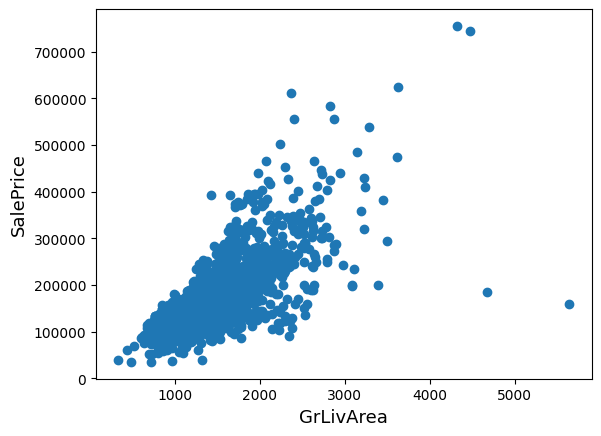

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

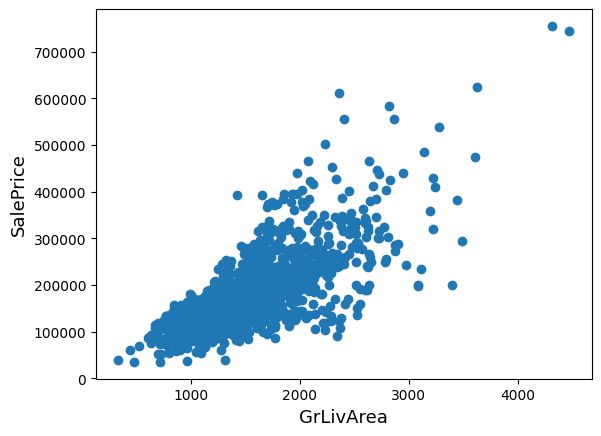

In [24]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Concat table

In [25]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [26]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
MasVnrType,60.541652
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806


### Missing values

In [27]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [28]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Features engeneering

In [29]:
# MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [30]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Checking skewed data

In [31]:
from scipy.stats import skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


## Training the model

### Prepair train, test

In [32]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Save the data to csv
train.to_csv('../data/housing_data/train_cleaned.csv', index=False)
test.to_csv('../data/housing_data/test_cleaned.csv', index=False)

y_train_df = pd.DataFrame(y_train)
y_train_df.to_csv('../data/housing_data/y_train.csv', index=False)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   object 
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   LotConfig      1458 non-null   object 
 9   LandSlope      1458 non-null   object 
 10  Neighborhood   1458 non-null   object 
 11  Condition1     1458 non-null   object 
 12  Condition2     1458 non-null   object 
 13  BldgType       1458 non-null   object 
 14  HouseStyle     1458 non-null   object 
 15  OverallQual    1458 non-null   int64  
 16  OverallCond    1458 non-null   object 
 17  YearBuilt      1458 non-null   int64  
 18  YearRemo

### Models to test

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define the columns for different transformations
categorical_cols = train.select_dtypes(include=['object']).columns
numeric_cols = train.select_dtypes(exclude=['object']).columns

# Define transformers for different types of columns
categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

numeric_transformer = make_pipeline(
    StandardScaler()
)

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols),
    ],
    remainder='passthrough'
)

In [34]:
# Define the model: Lasso, Random Forest, XGBoost

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

lasso = make_pipeline(
    preprocessor,
    Lasso(random_state=42)
)

rfr = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=42)
)

xgbr = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=42)
)

In [35]:
# Evaluate the models

from sklearn.model_selection import cross_val_score
import numpy as np

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = 5, n_jobs=-1))
    return(rmse)

models = [lasso, rfr, xgbr]

for model in models:
    score = rmse_cv(model)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    


27436.82 accuracy with a standard deviation of 2057.21
26558.91 accuracy with a standard deviation of 2363.53
26234.53 accuracy with a standard deviation of 1748.61


### Fine tune the models

In [36]:
# Fine tune the model using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


lasso_param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 
    'lasso__fit_intercept': [True, False], 
    'lasso__max_iter': [1000, 2000, 3000]
}

rfr_param_grid = {
    'randomforestregressor__n_estimators': randint(50, 300), 
    'randomforestregressor__max_depth': randint(1, 10),
    'randomforestregressor__min_samples_split': randint(2, 10),
    'randomforestregressor__min_samples_leaf': randint(1, 5),
    'randomforestregressor__max_features': [None, 'sqrt', 'log2']
}
xgb_param_grid = {
    'xgbregressor__learning_rate': [0.01, 0.1, 0.5], 
    'xgbregressor__max_depth': randint(1, 10), 
    'xgbregressor__n_estimators': randint(50, 300), 
    'xgbregressor__subsample': [0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.8, 1.0],
    'xgbregressor__gamma': uniform(0, 0.5),  
    'xgbregressor__reg_alpha': uniform(0, 1),  
    'xgbregressor__reg_lambda': uniform(0, 1), 
    'xgbregressor__min_child_weight': randint(1, 10)  
}

lasso_random_search = RandomizedSearchCV(lasso, lasso_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42).fit(train, y_train)
rfr_random_search = RandomizedSearchCV(rfr, rfr_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42).fit(train, y_train)
xgb_random_search = RandomizedSearchCV(xgbr, xgb_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42).fit(train, y_train)

#Display the best parameters
print("Lasso best parameters: ", lasso_random_search.best_params_)
print("Random Forest best parameters: ", rfr_random_search.best_params_)
print("XGBoost best parameters: ", xgb_random_search.best_params_)

Lasso best parameters:  {'lasso__max_iter': 1000, 'lasso__fit_intercept': False, 'lasso__alpha': 10.0}
Random Forest best parameters:  {'randomforestregressor__max_depth': 9, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 219}
XGBoost best parameters:  {'xgbregressor__colsample_bytree': 0.8, 'xgbregressor__gamma': 0.194338644844741, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 8, 'xgbregressor__n_estimators': 203, 'xgbregressor__reg_alpha': 0.965255307264138, 'xgbregressor__reg_lambda': 0.6070342476866847, 'xgbregressor__subsample': 0.8}


In [37]:
# Evaluate the models with the best parameters

lasso_best = make_pipeline(
    preprocessor,
    Lasso(max_iter=1000,
          fit_intercept=False,
          alpha=10.0,
          random_state=42,)
)

rfr_best = make_pipeline(
    preprocessor,
    RandomForestRegressor(max_depth=9,
                          max_features=None,
                          min_samples_leaf=3,
                          min_samples_split=4,
                          n_estimators=219,
                          random_state=42,)
)

xgbr_best = make_pipeline(
    preprocessor,
    XGBRegressor(colsample_bytree=0.8,
                 gamma=0.194338644844741,
                 learning_rate=0.1,
                 max_depth=5,
                 min_child_weight=8,
                 n_estimators=203,
                 reg_alpha=0.965255307264138,
                 reg_lambda=0.6070342476866847,
                 subsample=0.8,
                 random_state=42,)
)

models = [lasso_best, rfr_best, xgbr_best]

for model in models:
    score = rmse_cv(model)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

26483.36 accuracy with a standard deviation of 1790.12
26810.79 accuracy with a standard deviation of 2485.12
22929.56 accuracy with a standard deviation of 2286.03


### Stack models

In [38]:
# Stacking Regressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
        ('lasso', lasso_best),
        ('rfr', rfr_best),
        ('xgbr', xgbr_best),
]

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),
    cv=5,
    n_jobs=-1
)

stacking_regressor    

StackingRegressor(cv=5,
                  estimators=[('lasso',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(remainder='passthrough',
                                                                  transformers=[('cat',
                                                                                 Pipeline(steps=[('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                                                                 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condi...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=8,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=203,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                  final_estimator=RidgeCV(), n_jobs=-1)

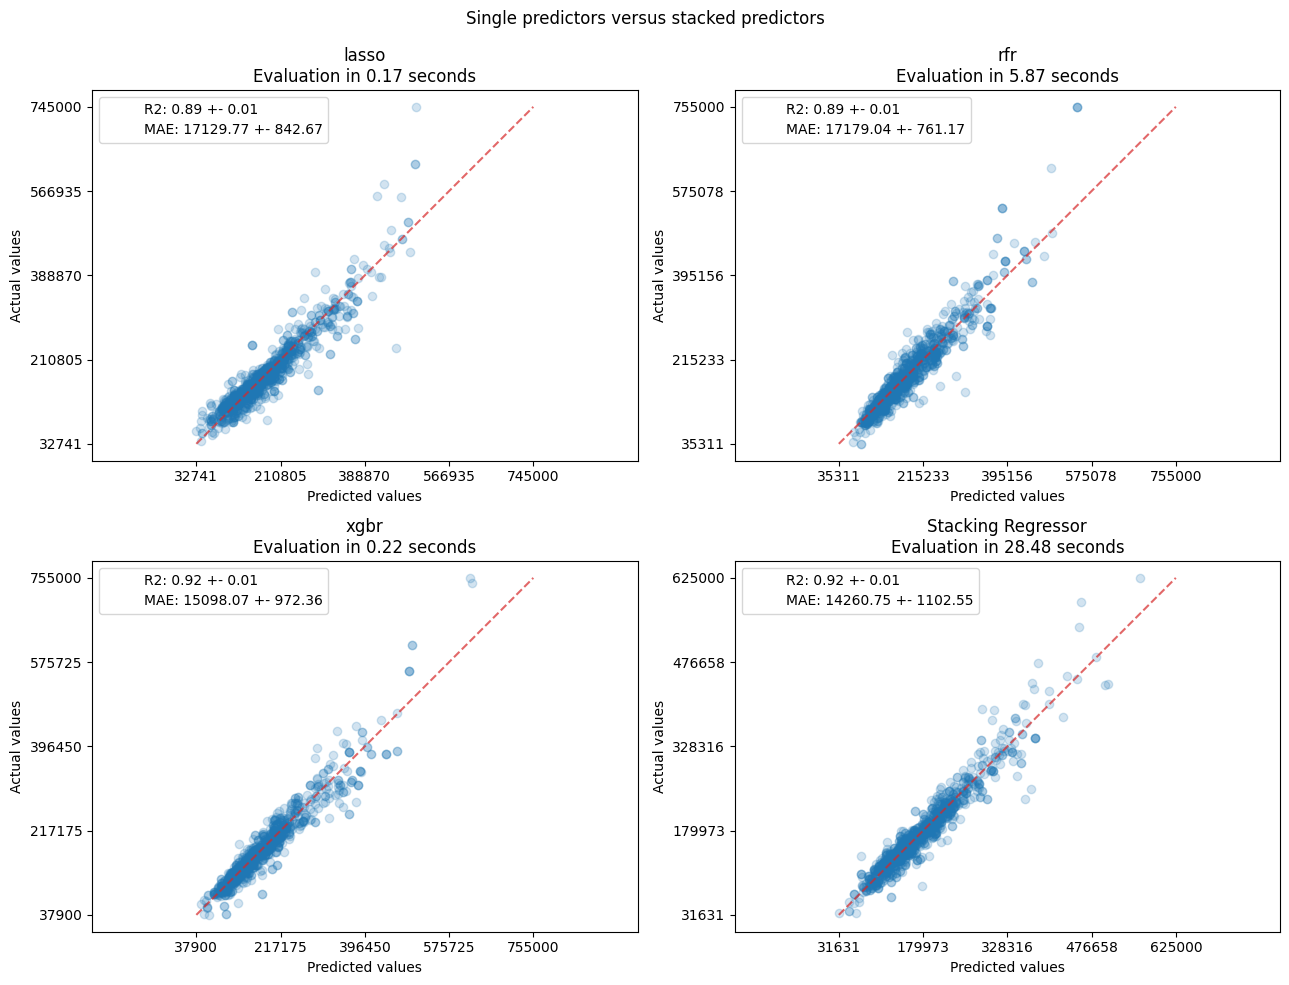

In [39]:
# Measure the performance of each model and the stacking regressor

import time

import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict, cross_validate

fig, axs = plt.subplots(2, 2, figsize=(13, 10))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

    start_time = time.time()
    scores = cross_validate(
        est, train, y_train, scoring=list(scorers.values()), n_jobs=-1, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, train, y_train, n_jobs=-1, verbose=0)
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        for key, value in scorers.items()
    }

    display = PredictionErrorDisplay.from_predictions(
        y_true=y_train,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        ax=ax,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )
    ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

    for name, score in scores.items():
        ax.plot([], [], " ", label=f"{name}: {score}")
    ax.legend(loc="upper left")

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Save model

In [40]:
# Save the stacking regressor
import joblib

joblib.dump(stacking_regressor, 'stacking_regressor.pkl')

['preprocessor.pkl']